In [1]:
import pandas as pd
import numpy as np

In [2]:
file = ("fraud_detection_train.csv")
df = pd.read_csv(file)

Load data set fraud_detection_train menggunakan fungsi read_csv yang terdapa pada library pandas

## Data Understanding

In [3]:
df.shape

(200217, 53)

In [4]:
print(df.columns)

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')


In [5]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Menampilkan 5 data yang terdapat dalam data set 

In [6]:
#descriptive data
df.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,0.048213,0.005184,0.015034,0.019799,0.007082,0.064190,0.026661,0.0,0.005844,0.021217,0.025203,0.041435,0.026122,0.006213,0.031236,0.008935,0.0,0.005854,0.049182,0.019963,0.026491,0.003336,0.000559,0.002198,0.007777,0.017876,0.003981,0.017156,0.004530,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,0.244711,0.073262,0.127421,0.161491,0.087644,0.273869,0.169462,0.0,0.079051,0.153505,0.164727,0.269264,0.254258,0.097985,0.182940,0.116449,0.0,0.076416,0.222576,0.162565,0.173277,0.061113,0.023855,0.047882,0.101456,0.136656,0.066816,0.144561,0.071477,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000,6.000000,4.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [8]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

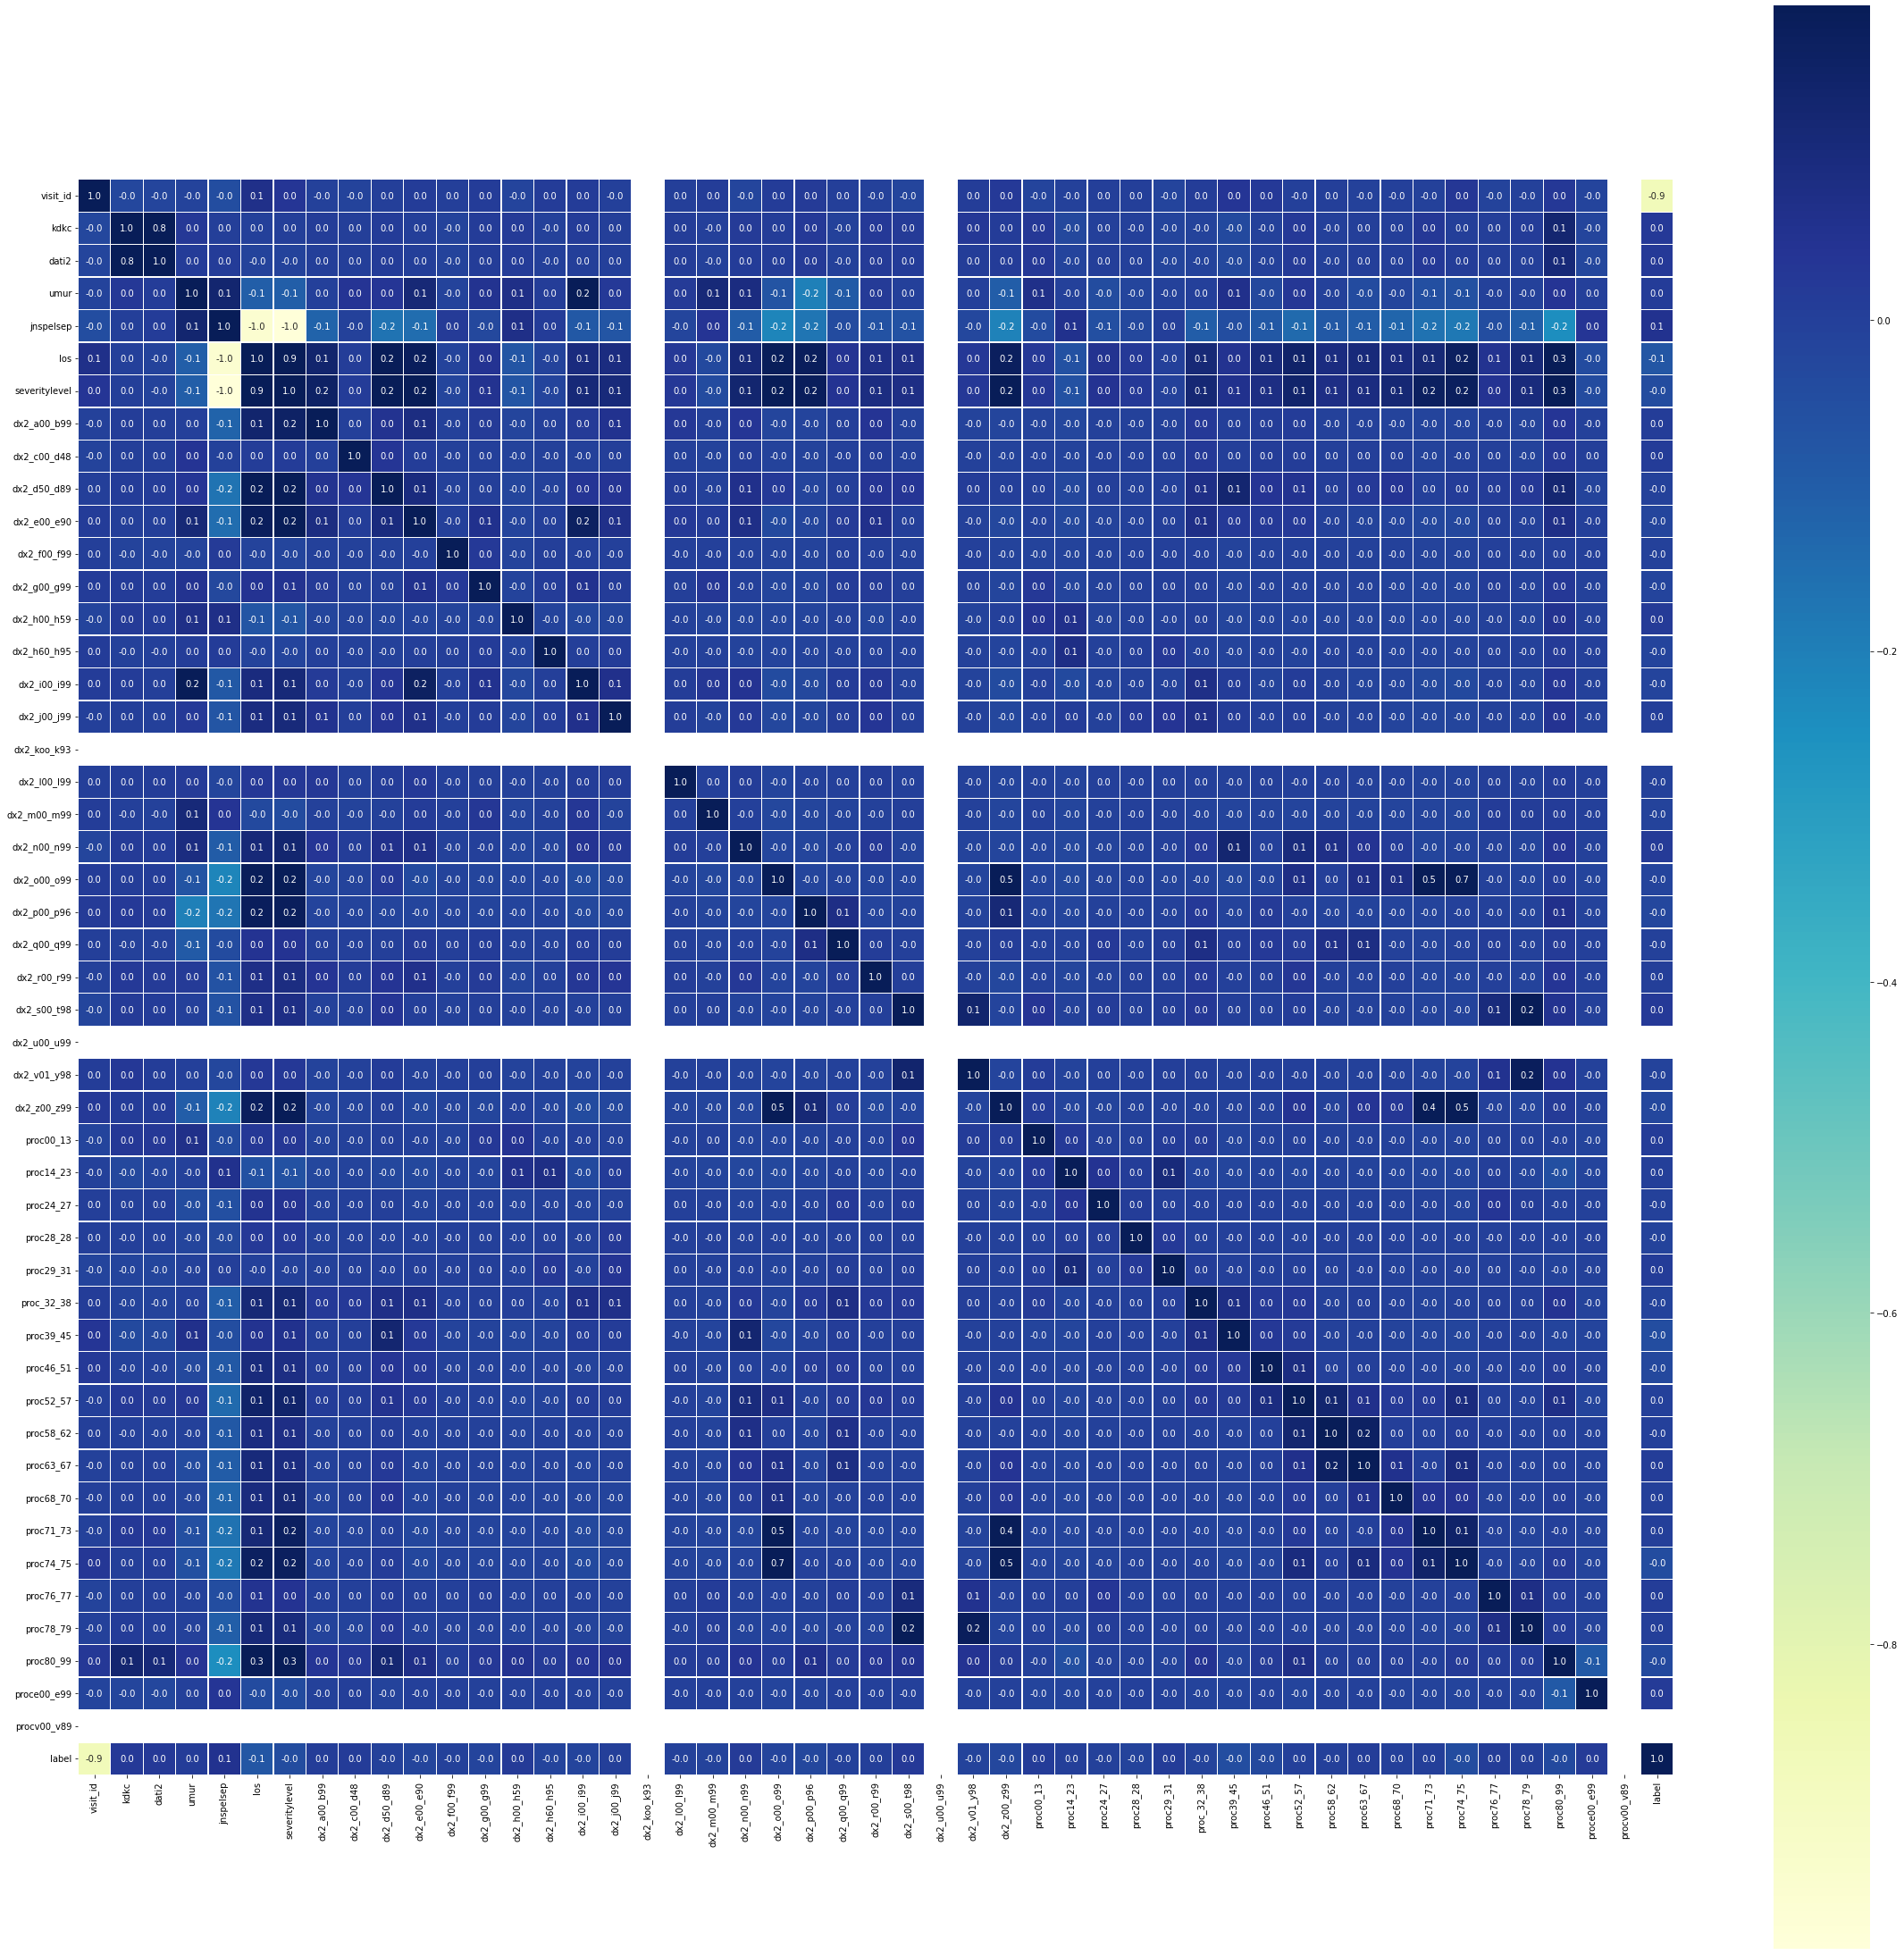

In [9]:
#seeing correlation between the attributes
import matplotlib
import seaborn as sns

SpearmanCorr = df.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(40,40))
sns.heatmap(SpearmanCorr, vmax=.19, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

In [10]:
#not running yet
df = df.drop('dati2', 1)

### Persebaran Data

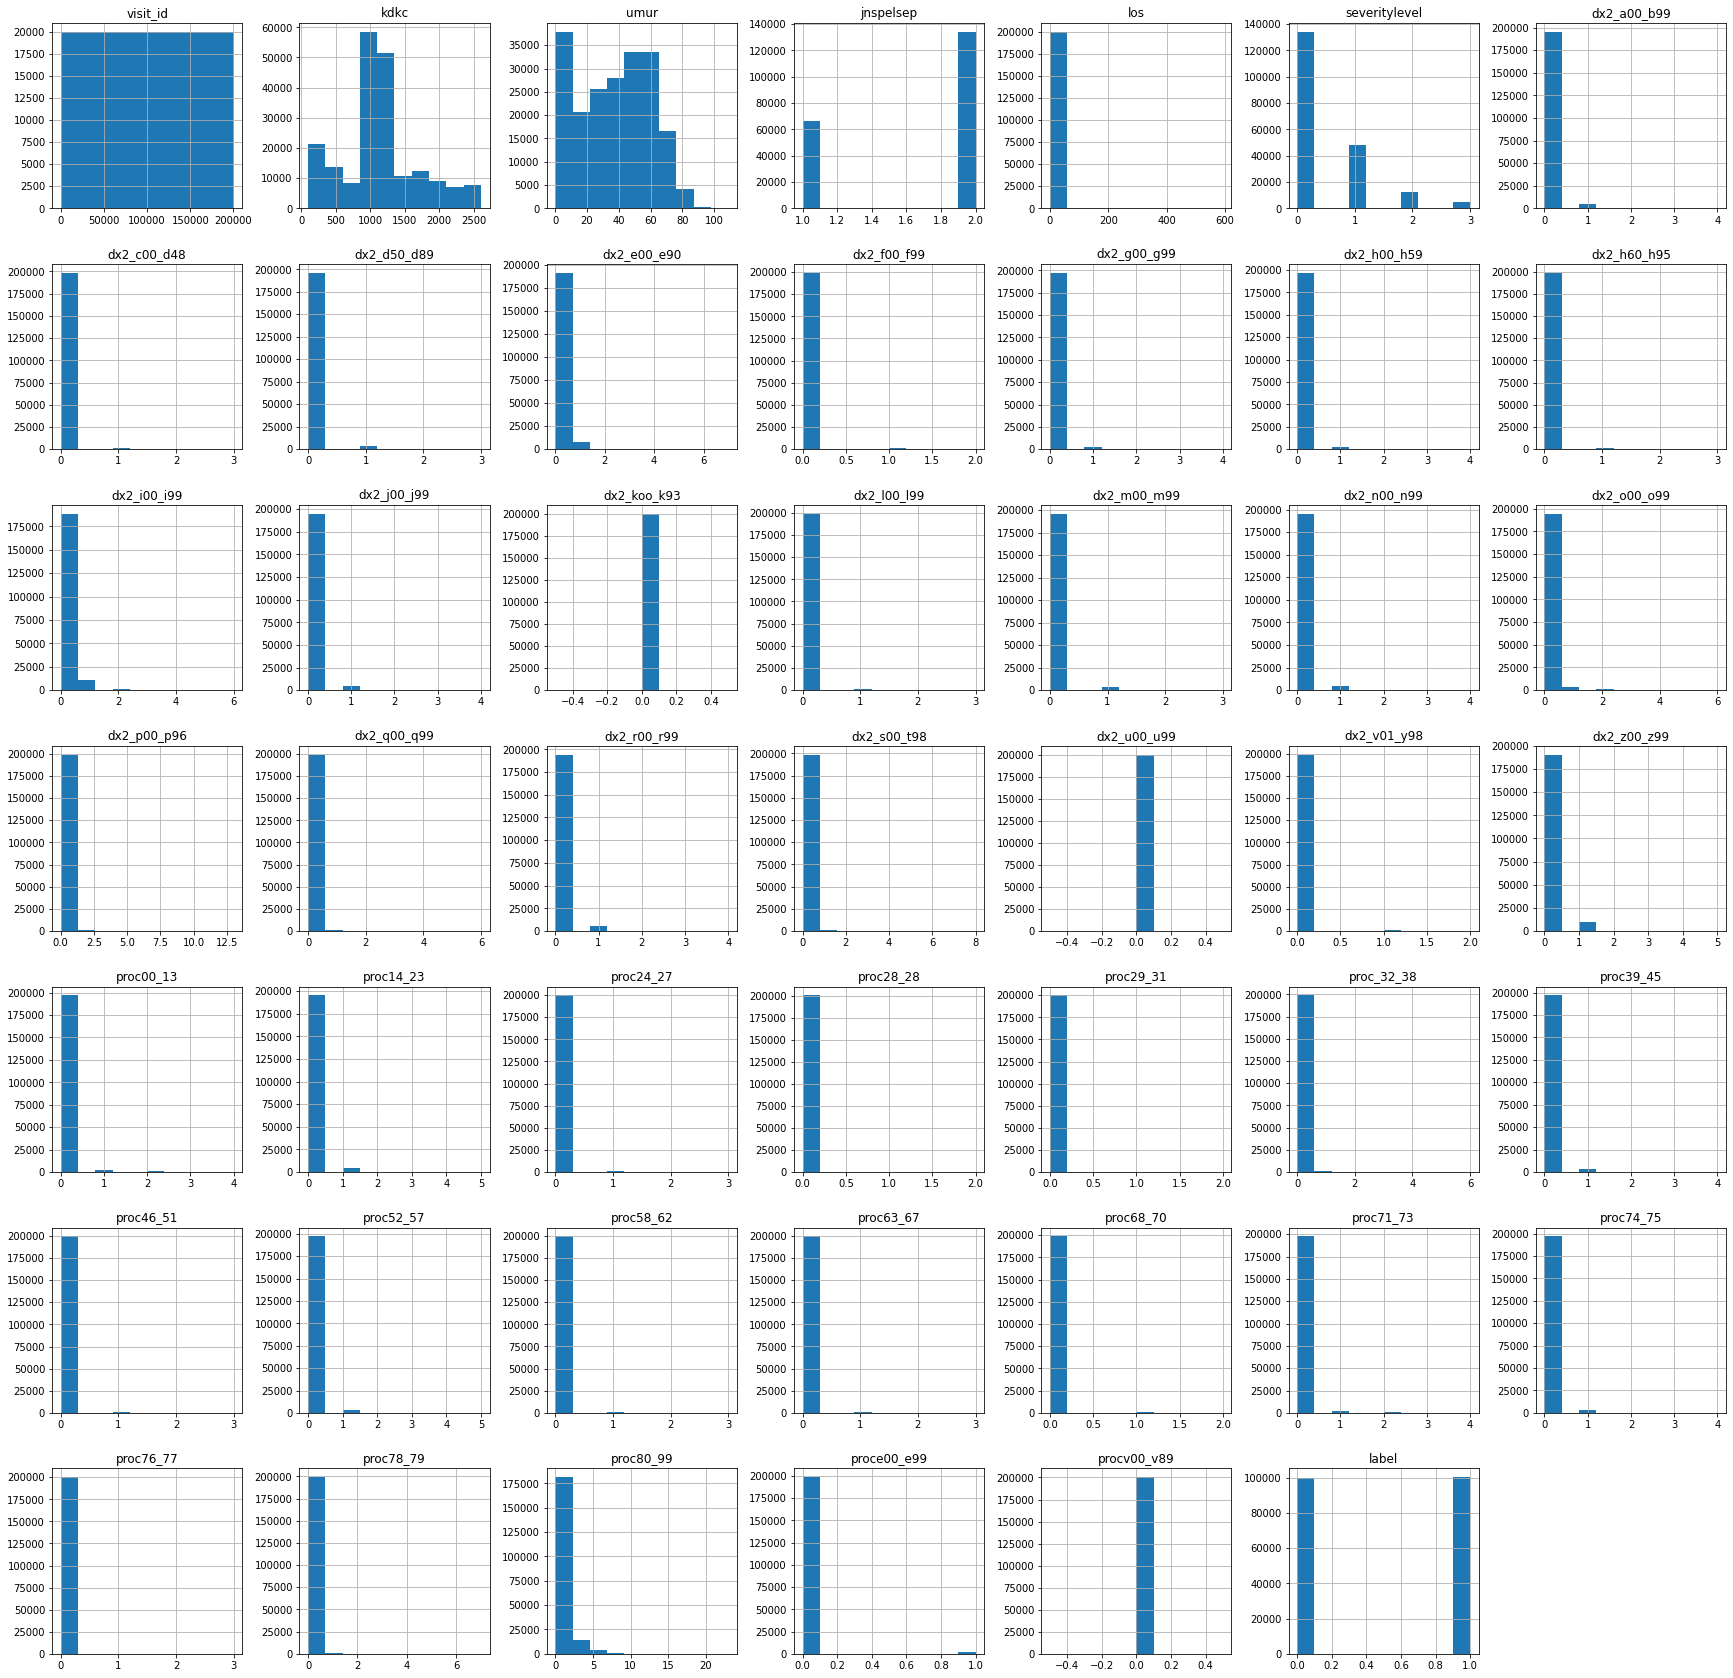

In [11]:
# menampilkan histogram untuk semua atribut

import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# menampilkan distribusi variabel dengan menggunakan plot histogram
df.hist(figsize=(30, 30))
plt.show()

# **Data Preparation**

### Telaah Data

In [12]:
def print_str_unique(df):
    for col in df.columns:            
            unique_cnt = len(df[col].unique())
            print(f'Column {col.rjust(13)} has {unique_cnt:5} unique values.')
            if unique_cnt == 1:
              print(f'{col}-->> need to be dropped.')
print_str_unique(df)

Column      visit_id has 200217 unique values.
Column          kdkc has   126 unique values.
Column       typeppk has    25 unique values.
Column         jkpst has     2 unique values.
Column          umur has   105 unique values.
Column     jnspelsep has     2 unique values.
Column           los has   142 unique values.
Column           cmg has    23 unique values.
Column severitylevel has     4 unique values.
Column    diagprimer has    21 unique values.
Column   dx2_a00_b99 has     5 unique values.
Column   dx2_c00_d48 has     4 unique values.
Column   dx2_d50_d89 has     4 unique values.
Column   dx2_e00_e90 has     7 unique values.
Column   dx2_f00_f99 has     3 unique values.
Column   dx2_g00_g99 has     5 unique values.
Column   dx2_h00_h59 has     5 unique values.
Column   dx2_h60_h95 has     4 unique values.
Column   dx2_i00_i99 has     7 unique values.
Column   dx2_j00_j99 has     5 unique values.
Column   dx2_koo_k93 has     1 unique values.
dx2_koo_k93-->> need to be droppe

### Membersihkan Data

### Cek Null Values

In [13]:
Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


### Cek Outliers

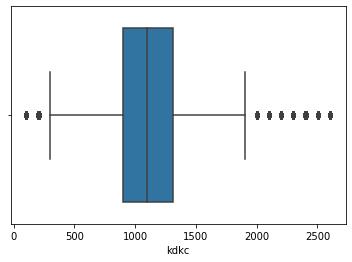

In [14]:
import seaborn as sns

sns.boxplot(x=df['kdkc'])

In [15]:
print(np.where(df['kdkc']>2000))

(array([     7,     10,     45, ..., 200190, 200204, 200212]),)


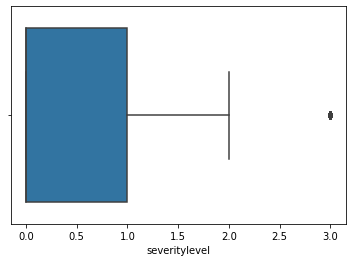

In [16]:
sns.boxplot(x=df['severitylevel'])


In [17]:
print(np.where(df['severitylevel']>1))

(array([     1,      9,     37, ..., 200177, 200197, 200205]),)


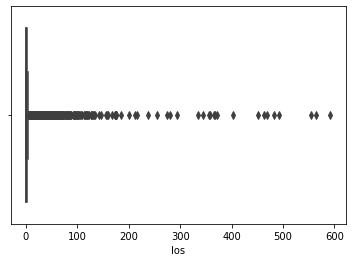

In [18]:
sns.boxplot(x=df['los'])

In [19]:
print(np.where(df['dx2_i00_i99']>1))

(array([   304,    394,    665, ..., 199868, 200011, 200175]),)


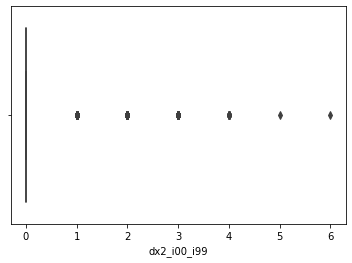

In [20]:
sns.boxplot(x=df['dx2_i00_i99'])

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

visit_id         100108.0
kdkc                411.0
umur                 38.0
jnspelsep             1.0
los                   2.0
severitylevel         1.0
dx2_a00_b99           0.0
dx2_c00_d48           0.0
dx2_d50_d89           0.0
dx2_e00_e90           0.0
dx2_f00_f99           0.0
dx2_g00_g99           0.0
dx2_h00_h59           0.0
dx2_h60_h95           0.0
dx2_i00_i99           0.0
dx2_j00_j99           0.0
dx2_koo_k93           0.0
dx2_l00_l99           0.0
dx2_m00_m99           0.0
dx2_n00_n99           0.0
dx2_o00_o99           0.0
dx2_p00_p96           0.0
dx2_q00_q99           0.0
dx2_r00_r99           0.0
dx2_s00_t98           0.0
dx2_u00_u99           0.0
dx2_v01_y98           0.0
dx2_z00_z99           0.0
proc00_13             0.0
proc14_23             0.0
proc24_27             0.0
proc28_28             0.0
proc29_31             0.0
proc_32_38            0.0
proc39_45             0.0
proc46_51             0.0
proc52_57             0.0
proc58_62             0.0
proc63_67   

In [22]:
print(df['kdkc'].quantile(0.10))
print(df['kdkc'].quantile(0.90))

303.0
2101.0


In [23]:
df["kdkc"] = np.where(df["kdkc"] <303.0, 303.0,df['kdkc'])
df["kdkc"] = np.where(df["kdkc"] >1750.0, 1750.0,df['kdkc'])
print(df['kdkc'].skew())

-0.1903395687739066


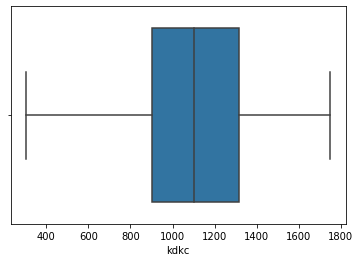

In [24]:
sns.boxplot(x=df['kdkc'])

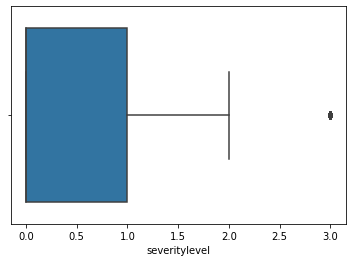

In [25]:
sns.boxplot(x=df['severitylevel'])

In [26]:
print(df['severitylevel'].quantile(0.20))
print(df['severitylevel'].quantile(0.80))

0.0
1.0


In [27]:
df["severitylevel"] = np.where(df["severitylevel"] <0.0, 0.0,df['severitylevel'])
df["severitylevel"] = np.where(df["severitylevel"] >2.0, 2.0,df['severitylevel'])
print(df['severitylevel'].skew())

1.277909056255376


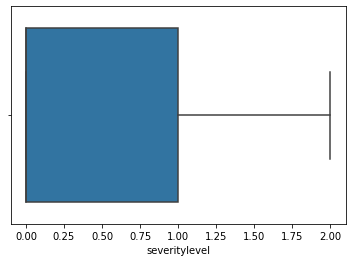

In [28]:
sns.boxplot(x=df['severitylevel'])

In [29]:
print(df['los'].quantile(0.10))
print(df['los'].quantile(0.90))

0.0
4.0


In [30]:
df["los"] = np.where(df["los"] <0.0, 0.0,df['los'])
df["los"] = np.where(df["los"] >3.0, 3.0,df['los'])
print(df['los'].skew())

1.1108259381309418


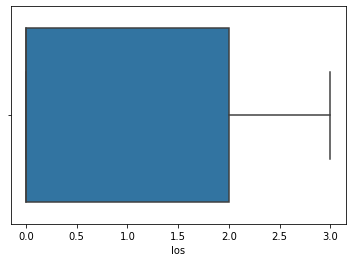

In [31]:
sns.boxplot(x=df['los'])

In [32]:
df["los"] = np.where(df["los"] >2.0, 2.0,df['los'])
print(df['los'].skew())

0.9233424366657109


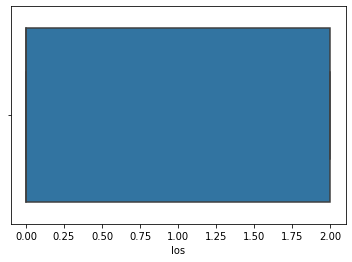

In [33]:
sns.boxplot(x=df['los'])

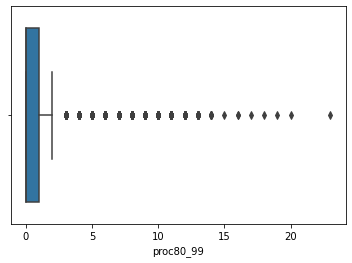

In [34]:
sns.boxplot(x=df['proc80_99'])

In [35]:
print(df['proc80_99'].quantile(0.10))
print(df['proc80_99'].quantile(0.90))

0.0
2.0


In [36]:
df["proc80_99"] = np.where(df["proc80_99"] <0.0, 0.0,df['proc80_99'])
df["proc80_99"] = np.where(df["proc80_99"] >2.0, 2.0,df['proc80_99'])
print(df['proc80_99'].skew())

0.6873545295639892


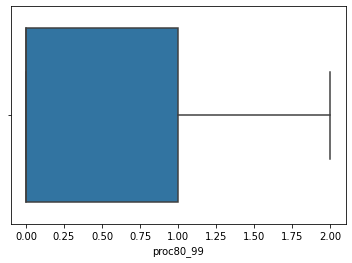

In [37]:
sns.boxplot(x=df['proc80_99'])

### OneHotEncoder

In [38]:
#OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [39]:
pip install feature-engine==0.3.0

     |████████████████████████████████| 219 kB 12.3 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [40]:
vars_categorical = ['typeppk', 'jkpst', 'cmg', 'diagprimer']
data_enc = pd.get_dummies(df[vars_categorical], drop_first=True)
encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)
encoder.fit(df[vars_categorical])
data_enc = encoder.transform(df[vars_categorical])

from feature_engine.categorical_encoders import OneHotCategoricalEncoder
one_enc = OneHotCategoricalEncoder(top_categories=None, drop_last=True)
one_enc.fit(df)

OneHotCategoricalEncoder(drop_last=True,
                         variables=['typeppk', 'jkpst', 'cmg', 'diagprimer'])

In [41]:
data_enc = one_enc.transform(df)
df.head()

,visit_id,kdkc,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107.0,SB,P,64,2,0.0,F,0.0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1
1,2,1303.0,C,L,45,1,2.0,E,2.0,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,1
2,3,1114.0,B,P,34,2,0.0,Q,0.0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1
3,4,601.0,SC,L,34,2,0.0,Q,0.0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1
4,5,1006.0,B,L,27,2,0.0,F,0.0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1


In [42]:
data_enc.head()

,visit_id,kdkc,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,...,cmg_Q,cmg_L,cmg_H,cmg_W,cmg_P,cmg_U,cmg_K,cmg_G,cmg_M,cmg_N,cmg_A,cmg_C,cmg_D,cmg_Z,cmg_J,cmg_O,cmg_S,cmg_I,cmg_V,cmg_T,diagprimer_f00_f99,diagprimer_e00_e90,diagprimer_r00_r99,diagprimer_j00_j99,diagprimer_s00_t98,diagprimer_h00_h59,diagprimer_m00_m99,diagprimer_c00_d48,diagprimer_z00_z99,diagprimer_p00_p96,diagprimer_h60_h95,diagprimer_k00_k93,diagprimer_g00_g99,diagprimer_i00_i99,diagprimer_l00_l99,diagprimer_a00_b99,diagprimer_n00_n99,diagprimer_o00_o99,diagprimer_d50_d89,diagprimer_q00_q99
0,1,1107.0,64,2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1303.0,45,1,2.0,2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1114.0,34,2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,601.0,34,2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1006.0,27,2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standarisasi

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_enc)
train_scaled = scaler.transform(data_enc)

In [44]:
train_scaled

array([[-1.73204216,  0.02347536,  1.17550878, ..., -0.22975506,
        -0.22893468, -0.22543364],
       [-1.73202485,  0.46477801,  0.35285088, ..., -0.22975506,
        -0.22893468, -0.22543364],
       [-1.73200755,  0.03923617, -0.12342476, ..., -0.22975506,
        -0.22893468, -0.22543364],
       ...,
       [ 1.73200755, -1.78676611, -1.46565608, ..., -0.22975506,
        -0.22893468, -0.22543364],
       [ 1.73202485, -0.19942751,  0.65593537, ..., -0.22975506,
        -0.22893468, -0.22543364],
       [ 1.73204216, -0.18141516, -1.42235829, ..., -0.22975506,
        -0.22893468, -0.22543364]])

### Binning

In [45]:
umur = df['umur'].to_numpy()
bins = [-1, 1, 10, 20, 60,109]
labels = [1, 2, 3, 4, 5 ]
data_enc['Umur Binning'] = pd.cut(data_enc['umur'], bins=bins,labels=labels)

In [46]:
data_enc[['umur','Umur Binning']].head(10)

,umur,Umur Binning
0,64,5
1,45,4
2,34,4
3,34,4
4,27,4
5,0,1
6,73,5
7,64,5
8,21,4
9,44,4


In [47]:
umur = df['los'].to_numpy()
bins = [-1, 5, 10, 11]
labels = [1, 2, 3]
data_enc['Los Binning'] = pd.cut(data_enc['los'], bins=bins,labels=labels)

In [48]:
data_enc[['los','Los Binning']].head(10)

,los,Los Binning
0,0.0,1
1,2.0,1
2,0.0,1
3,0.0,1
4,0.0,1
5,0.0,1
6,2.0,1
7,0.0,1
8,0.0,1
9,2.0,1


### Split Data

In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_enc.drop(labels=['label'], axis=1), data_enc['label'], test_size=0.2)

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x7f8928939560>)

In [51]:
vector_names = list(X_train.columns[selector.get_support(indices=True)])
print(vector_names)

['visit_id', 'kdkc', 'umur', 'los', 'proc39_45', 'typeppk_C ', 'typeppk_SC', 'typeppk_D ', 'cmg_H', 'cmg_O']


In [52]:
trainX_best = X_train[vector_names]
testX_best = X_test[vector_names]

print(trainX_best.shape)
print(testX_best.shape)

(160173, 10)
(40044, 10)


## Modelling

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(trainX_best, y_train)
y_pred = knn.predict(testX_best)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9999250824093497


In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report =\n",classification_report(y_test, y_pred))
print("Confusion report =\n",confusion_matrix(y_test, y_pred))
print("Accuracy score =\n",accuracy_score(y_test, y_pred))

Classification report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19866
           1       1.00      1.00      1.00     20178

    accuracy                           1.00     40044
   macro avg       1.00      1.00      1.00     40044
weighted avg       1.00      1.00      1.00     40044

Confusion report =
 [[19865     1]
 [    2 20176]]
Accuracy score =
 0.9999250824093497


In [55]:
#importing model to pickle file
import pickle
with open('BPJSFraudClassifier.pkl','wb') as file:
    pickle.dump(knn,file)

In [56]:
model_file = open('BPJSFraudClassifier.pkl', 'rb')
model = pickle.load(model_file, encoding='bytes')